<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
file_path = "/Users/seoyeonchang/DSI-SF-6/projects/project-two/sat_scores.csv"

In [3]:
import csv

with open(file_path) as f:
    reader = csv.reader(f)
    data = [row for row in reader]
    #print data
    columns = data[0]
    #print columns
    rows = data[1:-1]
    #print rows
    vectors = zip(*rows)
    #print vectors
    sat = {k:list(v) for k,v in zip(columns, vectors)}
    #print sat

In [4]:
print sat

{'Math': ['510', '513', '515', '505', '516', '499', '499', '506', '500', '501', '499', '510', '499', '489', '501', '488', '474', '526', '499', '527', '499', '515', '510', '517', '525', '515', '542', '439', '539', '512', '542', '553', '542', '589', '550', '545', '572', '589', '580', '554', '568', '561', '577', '562', '596', '550', '570', '603', '582', '599', '551'], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4'], 'Verbal': ['5

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
# make a pandas df object with the 'sat' dictionary
df_from_sat_dictionary = pd.DataFrame(sat)
# make a pandas df object with pandas .read_csv()
df_from_original_csv = pd.read_csv(file_path)


In [6]:
# compare those two dataframes
print df_from_sat_dictionary.dtypes
print "-----------------------------"
print df_from_original_csv.dtypes

Math      object
Rate      object
State     object
Verbal    object
dtype: object
-----------------------------
State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


In [7]:
#A: Datatypes of each columns of the dataframes are different.(object vs int)

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [8]:
sat = pd.read_csv(file_path)
sat.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [9]:
sat.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


In [10]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [11]:
#A: I've searched other data of SAT scores and the most of the 'Rate' columns 
# indicated the participation rate of SAT of each State.

#A: Verbal, Math : mean of verbal & math test scores of each State

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [12]:
data_info = {
    
    'Basic Info': {
        'Title' : 'SAT Data by State',
        'Shape' : '52 rows, 4 columns',
        'Memory Usage' : '1.7 KB',
        'Column names' : 'State, Rate, Verbal, Math'
    },
    
    'State': {
        'Type': 'String',
        'Description': 'This is US state in standard two letters'
    },
    'Rate': {
        'Type': 'Integer',
        'Description': 'This is the SAT participation rate of each state'
    },
    'Verbal': {
        'Type': 'Integer',
        'Description': 'This is the mean of SAT Verbal score'
    },
    'Math': {
        'Type': 'Integer',
        'Description': 'This is the mean of SAT Math score'
    }
    
}

print data_info

{'Math': {'Type': 'Integer', 'Description': 'This is the mean of SAT Math score'}, 'State': {'Type': 'String', 'Description': 'This is US state in standard two letters'}, 'Basic Info': {'Memory Usage': '1.7 KB', 'Shape': '52 rows, 4 columns', 'Column names': 'State, Rate, Verbal, Math', 'Title': 'SAT Data by State'}, 'Rate': {'Type': 'Integer', 'Description': 'This is the SAT participation rate of each state'}, 'Verbal': {'Type': 'Integer', 'Description': 'This is the mean of SAT Verbal score'}}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

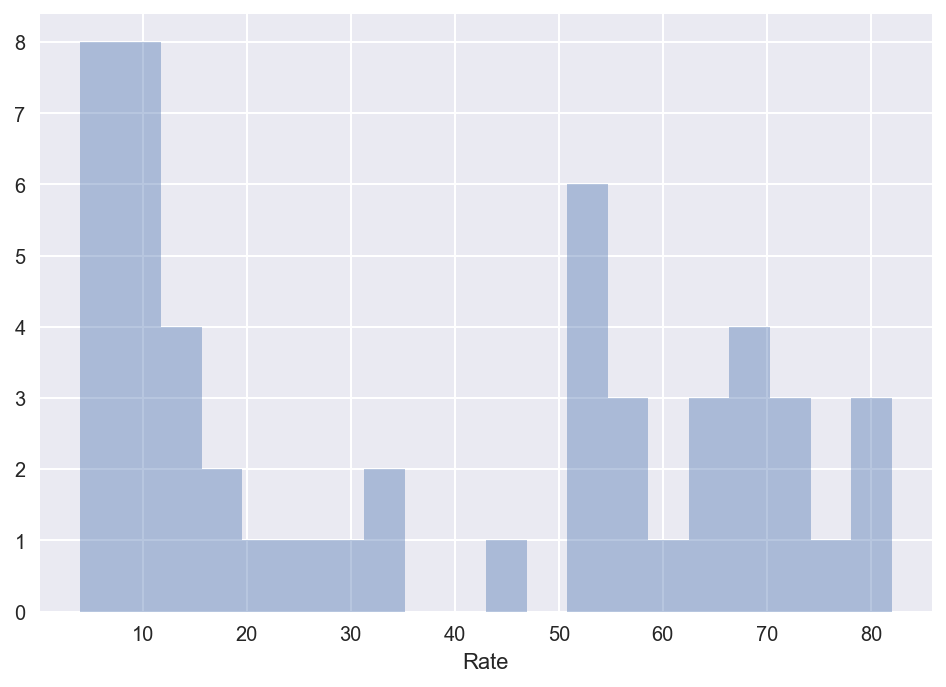

In [13]:
import seaborn as sns
sns.distplot(sat["Rate"], bins=20, kde=False)

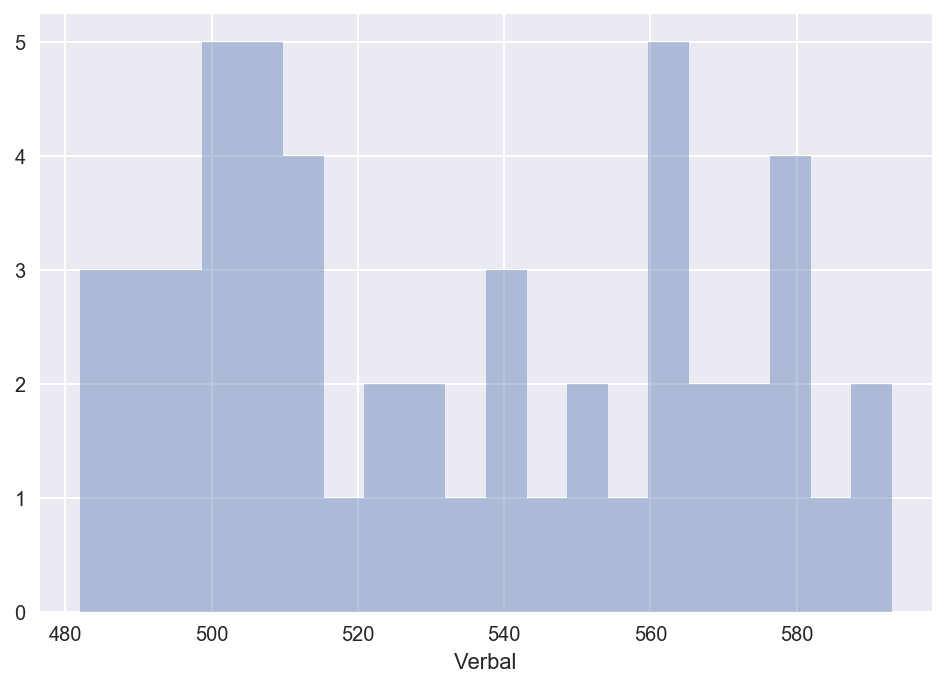

In [14]:
sns.distplot(sat["Verbal"],bins=20, kde=False)

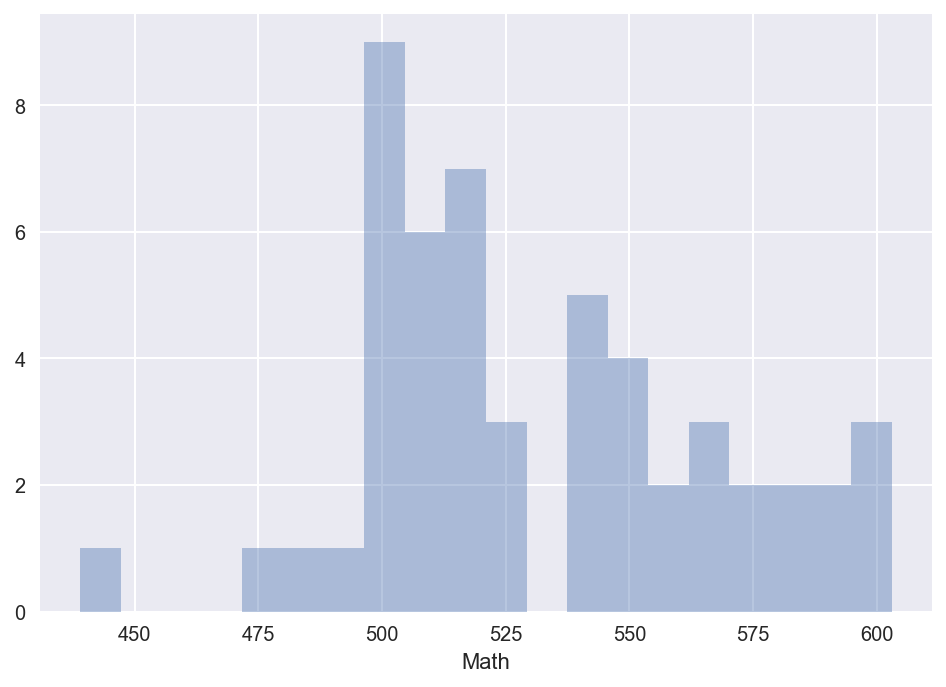

In [15]:
sns.distplot(sat["Math"],bins=20, kde=False)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

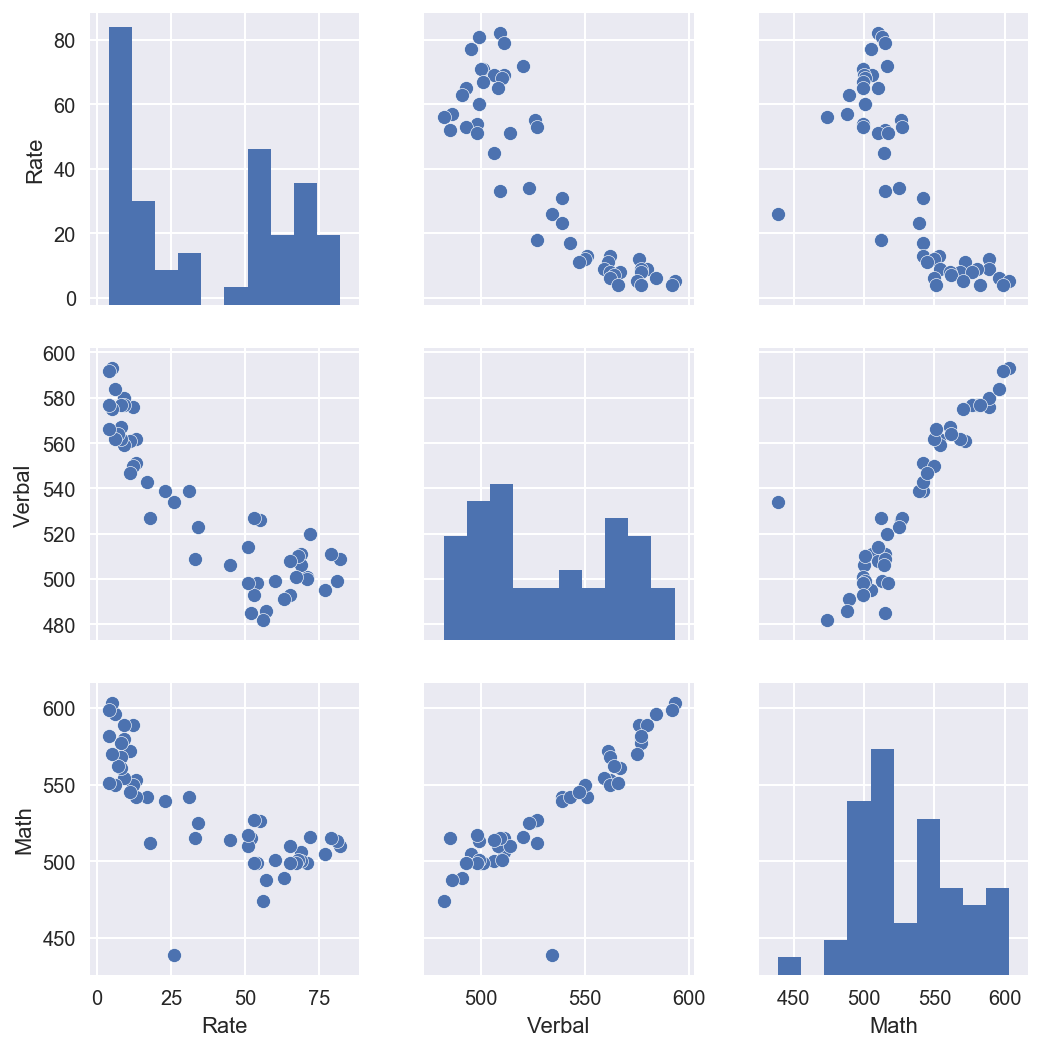

In [16]:
sns.pairplot(sat)

In [17]:
#reference: http://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

In [18]:
sat2 = sat[["Verbal", "Math"]]

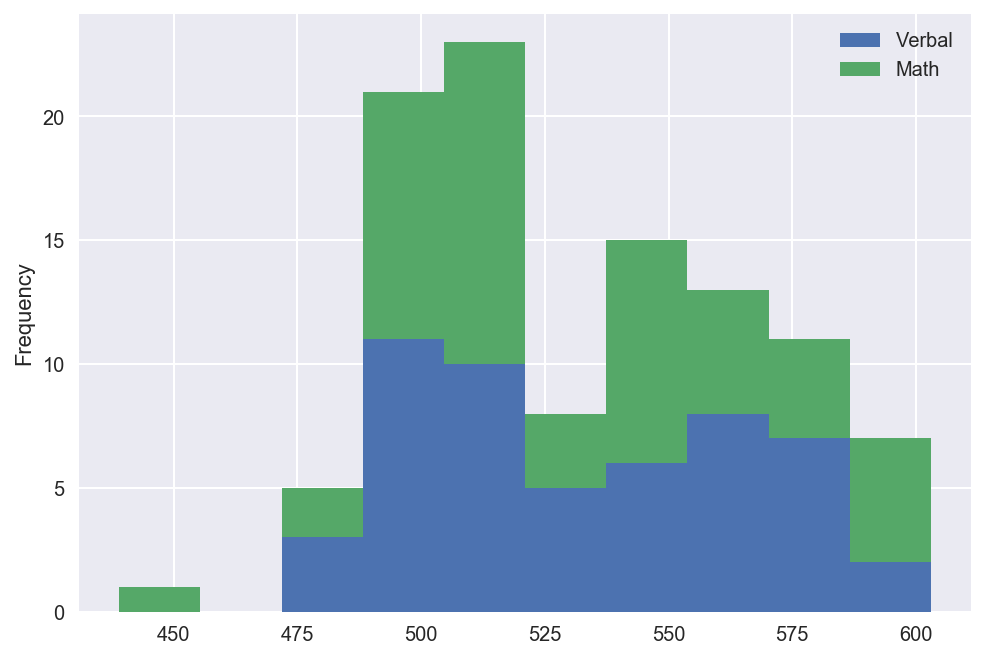

In [19]:
sat2.plot.hist(stacked=True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

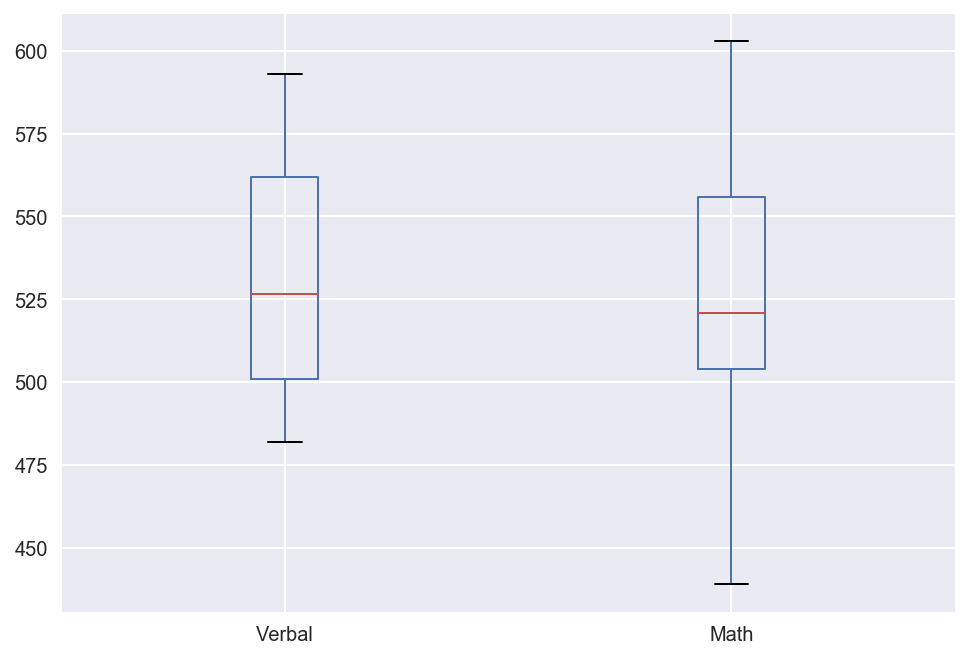

In [20]:
sat2.plot.box()

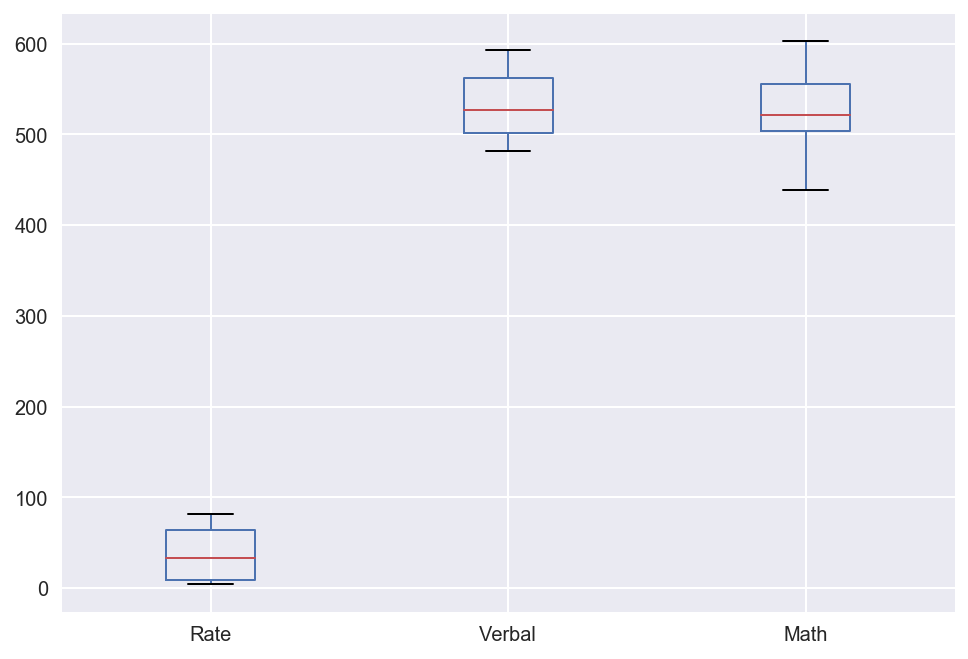

In [21]:
sat3 = sat[["Rate","Verbal","Math"]]
sat3.plot.box()

In [22]:
sat3.head(10)

,Rate,Verbal,Math
0,82,509,510
1,81,499,513
2,79,511,515
3,77,495,505
4,72,520,516
5,71,501,499
6,71,500,499
7,69,511,506
8,69,506,500
9,68,510,501


In [23]:
# Problem:
# The range of minimum & maximum values of 'Rate' column is very different from that of 'Verbal' & 'Math' columns 
# so that it makes difficult to compare those columns visually and intuitively on the same box plot.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [24]:
#A: Normalization or Standardization
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [25]:
# Normalization
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(sat3)
scaled_data[:10]

array([[ 1.        ,  0.24324324,  0.43292683],
       [ 0.98717949,  0.15315315,  0.45121951],
       [ 0.96153846,  0.26126126,  0.46341463],
       [ 0.93589744,  0.11711712,  0.40243902],
       [ 0.87179487,  0.34234234,  0.4695122 ],
       [ 0.85897436,  0.17117117,  0.36585366],
       [ 0.85897436,  0.16216216,  0.36585366],
       [ 0.83333333,  0.26126126,  0.40853659],
       [ 0.83333333,  0.21621622,  0.37195122],
       [ 0.82051282,  0.25225225,  0.37804878]])

In [26]:
# transform array type of scaled_data into pandas dataframe
normalized_df = pd.DataFrame(scaled_data, columns = ['Rate', 'Verbal', 'Math'])
normalized_df.head(10)

,Rate,Verbal,Math
0,1.000000,0.243243,0.432927
1,0.987179,0.153153,0.451220
2,0.961538,0.261261,0.463415
3,0.935897,0.117117,0.402439
4,0.871795,0.342342,0.469512
5,0.858974,0.171171,0.365854
6,0.858974,0.162162,0.365854
7,0.833333,0.261261,0.408537
8,0.833333,0.216216,0.371951
9,0.820513,0.252252,0.378049


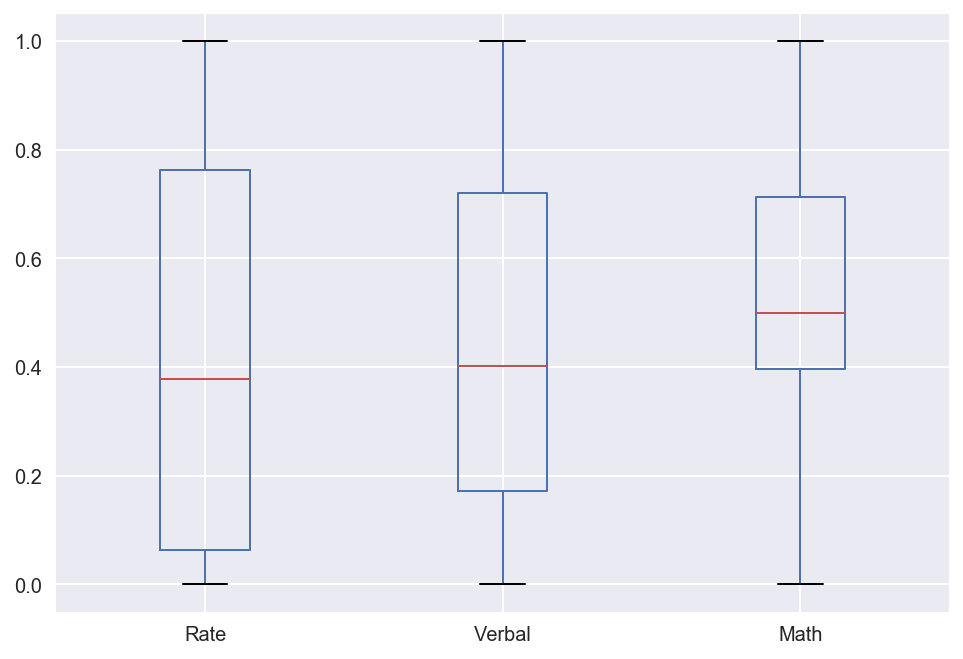

In [27]:
# Plot 
normalized_df.plot.box()

In [28]:
# Standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sat3)
scaled_data[:10]

array([[ 1.6586345 , -0.6993518 , -0.60279817],
       [ 1.62164951, -1.00316377, -0.5186868 ],
       [ 1.54767954, -0.6385894 , -0.46261255],
       [ 1.47370956, -1.12468856, -0.74298379],
       [ 1.28878461, -0.36515862, -0.43457542],
       [ 1.25179962, -0.94240138, -0.91120654],
       [ 1.25179962, -0.97278257, -0.91120654],
       [ 1.17782965, -0.6385894 , -0.71494667],
       [ 1.17782965, -0.79049539, -0.88316941],
       [ 1.14084466, -0.6689706 , -0.85513229]])

In [29]:
# transform array type of scaled_data into pandas dataframe
standardized_df = pd.DataFrame(scaled_data, columns = ['Rate', 'Verbal', 'Math'])
standardized_df.head(10)

,Rate,Verbal,Math
0,1.658635,-0.699352,-0.602798
1,1.621650,-1.003164,-0.518687
2,1.547680,-0.638589,-0.462613
3,1.473710,-1.124689,-0.742984
4,1.288785,-0.365159,-0.434575
5,1.251800,-0.942401,-0.911207
6,1.251800,-0.972783,-0.911207
7,1.177830,-0.638589,-0.714947
8,1.177830,-0.790495,-0.883169
9,1.140845,-0.668971,-0.855132


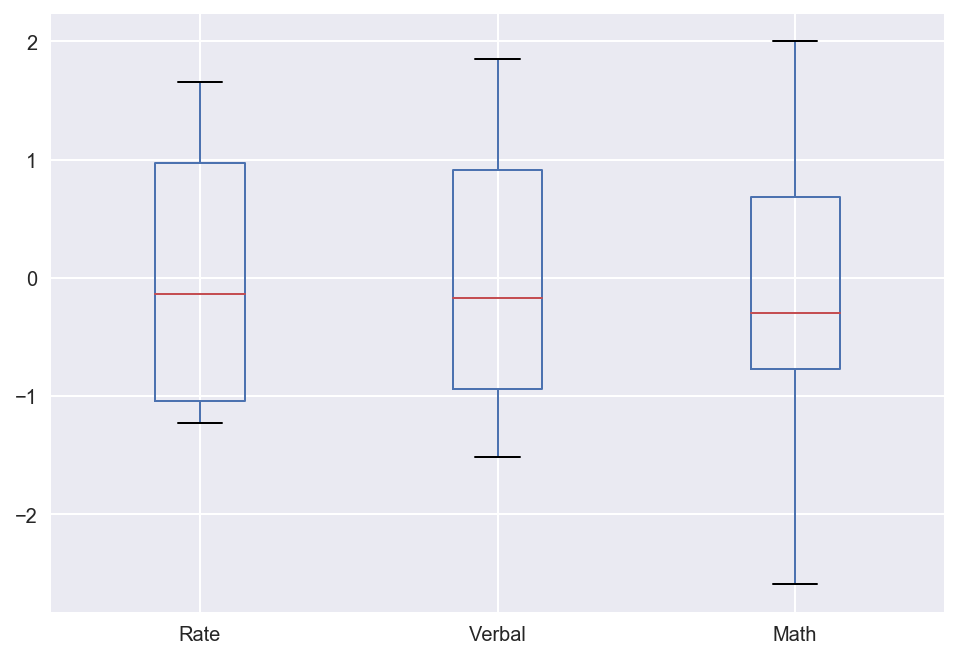

In [30]:
# Plot
standardized_df.plot.box()

In [31]:
# If I want to show all features which are on very different scales in one box plot,
# I need to standardize the attributes before plotting
# After standardization, features could be centered around 0 with a standard deviation of 1.
# Therefore, this method could be very effective when plotting a box plot which is designed for displaying data
# based on median and standard deviation
# The problem is that I will not be able to understand the real values of each category after standardization.
# Therefore, we should keep in mind that it can be only used to compare the distribution of data sets, 
# not to compare the real values.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [32]:
states_above_mean_verbal = sat[sat["Verbal"] > sat["Verbal"].mean()]
print states_above_mean_verbal

   State  Rate  Verbal  Math
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551


In [33]:
# make a 'list' of states which has verbal scores greater than mean 
states_above_mean_verbal = np.array(states_above_mean_verbal, dtype = pd.Series)

In [34]:
print "number of states: ", len(sat)
print "number of states above the verbal mean: ", len(states_above_mean_verbal)

number of states:  52
number of states above the verbal mean 24


In [35]:
# The number of states above the verbal mean is almost half of the number of states.
# This means that the distribution or verbal score is almost normal distribution

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [36]:
states_above_median = sat[sat["Verbal"] > sat["Verbal"].median()]
print states_above_median


   State  Rate  Verbal  Math
19    WA    53     527   527
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
29    WV    18     527   512
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551


In [37]:
# make a 'list' of states which has verbal scores greater than median
states_above_median = np.array(states_above_median , dtype=pd.Series)

In [39]:
len(states_above_median)

26

In [ ]:
# The number of states above the verbal median is the half of the number of states.
# This means that mean and median of this distribution is very close

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [ ]:
diff_verbal_math = sat["Verbal"] - sat["Math"]

In [ ]:
sat["diff_verbal_math"] = diff_verbal_math

In [ ]:
sat.head(5)

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [ ]:
# new df of the 10 states with the greatest gap between Verbal and Math scores where Verbal is greater than Math
df1 = sat.sort("diff_verbal_math",ascending=False).head(10)

In [ ]:
df1.head(3)

In [ ]:
# new df of states with the greatest gap between Verbal and Math such that Math is greater than Verbal
df2 = sat.sort("diff_verbal_math",ascending=True).head(10)

In [ ]:
df2.head(3)


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [ ]:
#A: While Verbal & Math are highly correlated, 'Rate & Verbal'and 'Rate & Math' are inversely related.
sat_sub = sat[["Rate","Verbal","Math"]]
sat_sub.corr()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [ ]:
sat.describe()
# count : Total number of observations
# mean : mean of each column
# std : standard deviation of each column
# min : minimum value of each column
# 25% : value of 25 percentile of each column
# 50% : value of 50 percentile of each column
# 75% : value of 75 percentile of each column
# max : maximum value of each column

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [ ]:
sat_cov = sat_sub.cov()
sat_cov
# 1: While the values of correlation matrix range from -1 to 1, those of covariance matrix vary a lot. 
#    This is because covariance measures variables that have different units of measurement.
# 2: correlation is the covariance normalized. Let's say you want to calculate of correlation of X and Y.
#    you can calculate correlation with dividing covariance(X, Y)
#    by the square root of the multiplication of each variance of X and Y
# 3: Both matrices can be used to see how two variables related.
#    However, we prefer correlation matrix to covariance matrix because 
#    correlation matrix is the standardized version of covariance matrix.
#    You can't easily compare covariances from two data sets that have different variances.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [ ]:
df = pd.read_csv("/Users/seoyeonchang/DSI-SF-6/projects/project-two/drug-use-by-age.csv")

In [ ]:
df.head(5)

In [ ]:
df.info()

In [ ]:
# This requires some cleanings, and some missing in values which affects on numerical computations.

# 1. incorrect data types
# df.info() shows that there are 7 columns with `object` type
# cocaine-frequency          17 non-null object
# crack-frequency            17 non-null object
# heroin-frequency           17 non-null object
# inhalant-frequency         17 non-null object
# oxycontin-frequency        17 non-null object
# meth-frequency             17 non-null object
# those need to be converted to number type to be consistent with others.

# 2. invalid format in those columns with dtype 'object'
# many cells include '-' in those columns
# this breaks all methods that is based on numeric computation such as 
# sum(), min(), max() and median()
# therefore, '-' needs to be converted into 0.0

# 3. this is basically list of pair (x-use, x-frequency) where x denotes type of drug.
# this means if one is zero in value, then the other must be zero as well.
# for example, if stimulant-use is 0.0, then stimulant-frequency should be 0.0 as well.
# but the data shows (stimulant-use=0.0, stimulant-frequency=364) for age 65+ group
# this needs to be corrected as well

# Cleaning up '-'
cols = [
    'cocaine-frequency',
    'crack-frequency',
    'heroin-frequency',
    'inhalant-frequency',
    'oxycontin-frequency',
    'meth-frequency'
]

for col in cols:
    df.loc[df[col] == '-', col] = 0.0

# now convert varibles into float64 and assign it to ndf
ndf = df.apply(pd.to_numeric, errors='ignore')

# make sure dtypes
print ndf.dtypes

# now deselct record with 65+ as it is most likely incorrect
ndf = ndf[0:-1]

ndf.head(5)

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [ ]:
# I guess there should be correlation between age and drug use.

cols = [c for c in ndf.columns if "-use" in c]

for c in cols:
    ndf.plot('age', c)


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [ ]:
# hypothesis

# [Question] 
#   1. Would older age group consume as much drugs as they used to ?
    
# [Deliverables]
#   1. Graphs showing drug consumption trends for each age group.
        

**Report**



...

In [ ]:
## Report

cols = [c for c in ndf.columns if "-use" in c]
for c in cols:
    ndf.plot('age', c)

# given those graphs showing drug consumption trend for age groups, 
# most non-medical drug use tops at the mid-age group and gradually decrease toward to older groups showing n shape.
# One exception is `inhalant` which tops at the early age and goes decreasing. this can be explained that this is sort 
# of treatment that is more common among youngs

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [ ]:
new_df = sat[['State','Verbal','Math']]

In [ ]:
new_df.head(5)

In [ ]:
new_df.boxplot()

In [ ]:
new_df.describe()

In [ ]:
# American mathematician John Turkey(1915-2000) has a precised definition 
# for two types of outliers when analyzing a box plot.
# Outliers are either 3×IQR or more above the third quartile or 3×IQR or more below the first quartile.
# Suspected outliers are are slightly more central versions of outliers: 
# either 1.5×IQR or more above the third quartile or 1.5×IQR or more below the first quartile.
# From this point of view, there is no outlier in this data.
# The number of observations is limited in this case but the each unit represents the average score of
# each state, I will assume each point deserve consideration.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.